# Baseball  Regression Modeling Model Selection Using L1

## Learning Objectives

Run a basic regression using L1 regularization to conduct variable selection
    * run a simple OLS
    * analyze output
    * run L1 regression and identify best regularization parameter
    * interpret model parameters

## Imports

In [1]:
import pandas as pd
import statsmodels.api as sms
import sklearn.linear_model as lm

In [2]:
%matplotlib inline

## Get Data and Subset Data

In [3]:
# retrieve csv file and store to dataframe
df = pd.read_csv('baseball_data.csv')

# subset the dataframe removing rows with NULL values
bix = df.notnull().all(axis=1)
df = df[bix]

## A First Regression Model Using All Variables

The hope here is that we can get a batch look at how the variables relate to the target. This unfortunately fails due to tight correlations within the covariates.

In [4]:
model = sms.OLS(df.salary_in_thousands_of_dollars, sms.add_constant(df.iloc[:, 1:]))

Notes:
    * we acheive a fairly high R2 right off the bat with this approach .86
    * a couple of variables are significant or nearly so
        - on_base_percentage
        - number_of_runs
        - number_of_runs_batted_in
        - number_of_strike_outs
        - number_of_stolen_bases
        - indicator_of_free_agency_eligibility
        - indicator_of_free_agent_in_1991_1992
        - indicator_of_arbitration_eligibility
        - indicator_of_arbitration_in_1991_1992
    * there are a large number of variables, how do we know what should be in the model and what should be out?
    * warning 2 in the printed output below states there may be high multicollinearity (high correlation between covariates)

In [5]:
result = model.fit()

In [6]:
print(result.summary())

                                  OLS Regression Results                                  
Dep. Variable:     salary_in_thousands_of_dollars   R-squared:                       0.711
Model:                                        OLS   Adj. R-squared:                  0.696
Method:                             Least Squares   F-statistic:                     47.90
Date:                            Mon, 21 Mar 2016   Prob (F-statistic):           4.71e-74
Time:                                    17:00:54   Log-Likelihood:                -2602.7
No. Observations:                             329   AIC:                             5239.
Df Residuals:                                 312   BIC:                             5304.
Df Model:                                      16                                         
Covariance Type:                        nonrobust                                         
                                            coef    std err          t      P>|t|      [95

## Model Selection Using L1 Regression

Notes:
        * fit L1 penealized model with alpha between 2^-15 and 2^15 
        * this will force an increasing number of the parameters to zero
        * the nonzero variables are the selected variables
        * we choose the model with the minimal aic, bic
        * last we will refit the "best" model and interpret the variables

In [7]:
model = sms.OLS(df.salary_in_thousands_of_dollars, df.iloc[:, 1:])

In [8]:
# declare lists for storage
nums = list()
parmslist = list()

# loop from k = -15 to k = 15 increasing the value of the 
# penalization parameter calculated 2**k
for k in range(-15, 15):
    alpha = 2**k
    
    # fit regression
    reg_results = model.fit_regularized(alpha=alpha)
    
    # get aic and bic
    aic = reg_results.aic
    bic = reg_results.bic
    
    # count the number non zero parameters
    parmct = (reg_results.params > 0).sum()
    
    # get rsqrd
    rsqr = reg_results.rsquared
    
    # collect the list of nonzero parameters
    parms = reg_results.params[(reg_results.params > 0)].index.tolist()
    
    # store values
    parmslist.append(parms)
    nums.append((alpha, aic, bic, rsqr, parmct))

In [9]:
modelsdf = pd.DataFrame(nums, columns=['alpha', 'aic', 'bic', 'rsqr', 'parmsct'])

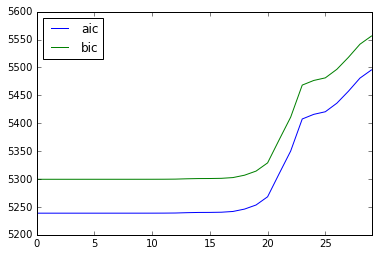

In [10]:
modelsdf[['aic', 'bic']].plot()

In [11]:
for lst in parmslist:
    strn = ''
    for item in lst:
        strn += item + ', '
    print strn
    print

batting_average, number_of_runs, number_of_home_runs, number_of_runs_batted_in, number_of_walks, number_of_stolen_bases, indicator_of_free_agency_eligibility, indicator_of_arbitration_eligibility, indicator_of_arbitration_in_1991_1992, 

batting_average, number_of_runs, number_of_home_runs, number_of_runs_batted_in, number_of_walks, number_of_stolen_bases, indicator_of_free_agency_eligibility, indicator_of_arbitration_eligibility, indicator_of_arbitration_in_1991_1992, 

batting_average, number_of_runs, number_of_home_runs, number_of_runs_batted_in, number_of_walks, number_of_stolen_bases, indicator_of_free_agency_eligibility, indicator_of_arbitration_eligibility, indicator_of_arbitration_in_1991_1992, 

batting_average, number_of_runs, number_of_home_runs, number_of_runs_batted_in, number_of_walks, number_of_stolen_bases, indicator_of_free_agency_eligibility, indicator_of_arbitration_eligibility, indicator_of_arbitration_in_1991_1992, 

batting_average, number_of_runs, number_of_home_

## Rerun Regression on "Best" Model

Notes:
    * Using the best model from above, we re-fit without L1 regularization.
    * On the first fit below number_of_runs and number_of_walks are not significant so we re-fit after dropping the variables.

##### Model 1

In [12]:
model = sms.OLS(df.salary_in_thousands_of_dollars, 
                sms.add_constant(
                    df[[
                        'number_of_runs', 
                        'number_of_home_runs', 
                        'number_of_runs_batted_in',
                        'number_of_walks',
                        'number_of_stolen_bases',
                        'indicator_of_free_agency_eligibility',
                        'indicator_of_arbitration_eligibility' 
                        ]]))

In [13]:
results = model.fit()

In [14]:
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     salary_in_thousands_of_dollars   R-squared:                       0.663
Model:                                        OLS   Adj. R-squared:                  0.655
Method:                             Least Squares   F-statistic:                     90.12
Date:                            Mon, 21 Mar 2016   Prob (F-statistic):           6.26e-72
Time:                                    17:01:12   Log-Likelihood:                -2628.0
No. Observations:                             329   AIC:                             5272.
Df Residuals:                                 321   BIC:                             5302.
Df Model:                                       7                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [95.

##### Model 2

Interpretation:
    * for continuous variables number_runs_batted_in and number_of_stolen_bases we interpret the coefficients as
        - a one unit change in number_of_runs_batted_in corresponds to a 18.7 thousand dollar increase in salary
        - a one unit change in number_of_stolen_bases corresponds to a 11.4 thousand dollar increase in salary
    * for indicator variables we interpret the coefficients as
        - when a person is free agent eligible we see an average 1.33 million increase in salary
        - when a person is arbitration eligible we see an average .87 million increase in salary

In [15]:
model = sms.OLS(df.salary_in_thousands_of_dollars, 
                sms.add_constant(
                    df[[
                        'number_of_runs_batted_in',
                        'number_of_stolen_bases',
                        'indicator_of_free_agency_eligibility',
                        'indicator_of_arbitration_eligibility' 
                        ]]))

In [16]:
results = model.fit()

In [17]:
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     salary_in_thousands_of_dollars   R-squared:                       0.660
Model:                                        OLS   Adj. R-squared:                  0.656
Method:                             Least Squares   F-statistic:                     157.1
Date:                            Mon, 21 Mar 2016   Prob (F-statistic):           1.46e-74
Time:                                    17:01:13   Log-Likelihood:                -2629.4
No. Observations:                             329   AIC:                             5269.
Df Residuals:                                 324   BIC:                             5288.
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [95.